In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib
import bs4

In [64]:
url = "https://www.indeed.com/jobs?q=data+scientist&l="
source = urllib.request.urlopen(url)
soup = bs4.BeautifulSoup(source, 'lxml')

In [65]:
# Finding the total number of jobs. 
total_jobs_string = soup.find('div', attrs={'id': 'searchCount'}).text.split()[-2]
print("Total Jobs: %s" % (total_jobs_string))

# fetching digits and getting rid of ','
total_jobs_digits = [int(d) for d in total_jobs_string if d.isdigit()]
print(total_jobs_digits)

job_count = np.sum([digit*(10**exponent) for digit, exponent in zip(total_jobs_digits[::-1], range(len(total_jobs_digits)))])
print(job_count)

Total Jobs: 31,693
[3, 1, 6, 9, 3]
31693


In [135]:
import time
# Counting number of pages
num_pages = int(np.ceil(job_count/10))
print("Total number of pages:", num_pages)

job_links = []

for i in range(5): # looping only through 5 pages for now
    
    url = "https://www.indeed.com/jobs?q=data+scientist&start={}".format(i*10)
    page = urllib.request.urlopen(url)
    bs_tree = bs4.BeautifulSoup(page, 'lxml')
    job_link_area = bs_tree.find('td', attrs={'id': 'resultsCol'})
    job_postings = job_link_area.findAll('div')
    job_postings = [jp for jp in job_postings if not jp.get('class') is None and ''.join(jp.get('class')) == 'rowresult']
    
    job_hrefs = [jp.get('data-jk') for jp in job_postings]
    #job_hrefs = [jp.find('a').get('href') for jp in job_postings if jp.find('a').get('href').startswith('/rc/clk')]
    
    for i in job_hrefs:
        job_links.append('http://www.indeed.com/rc/clk?jk=' + i)
        
    time.sleep(1)

print(job_links)

Total number of pages: 3170
['http://www.indeed.com/rc/clk?jk=582c3b468eb88be4', 'http://www.indeed.com/rc/clk?jk=437cdf56df3773d1', 'http://www.indeed.com/rc/clk?jk=949bcc7b5b2c807c', 'http://www.indeed.com/rc/clk?jk=8e08819b34b75ecf', 'http://www.indeed.com/rc/clk?jk=b40932caa9504d5c', 'http://www.indeed.com/rc/clk?jk=df0b571b477b827c', 'http://www.indeed.com/rc/clk?jk=718e846d2a2ecd88', 'http://www.indeed.com/rc/clk?jk=39bfd768b89a6551', 'http://www.indeed.com/rc/clk?jk=693dfc80eb8f4990', 'http://www.indeed.com/rc/clk?jk=a5b94a9ccc7dc9c4', 'http://www.indeed.com/rc/clk?jk=1d5e643355ae3b2e', 'http://www.indeed.com/rc/clk?jk=9fb0026a72df885b', 'http://www.indeed.com/rc/clk?jk=eb1e40eb1874434e', 'http://www.indeed.com/rc/clk?jk=0d9e62d1c44673a4', 'http://www.indeed.com/rc/clk?jk=f167187a2af6ead2', 'http://www.indeed.com/rc/clk?jk=fcd42c873978bd49', 'http://www.indeed.com/rc/clk?jk=df0b571b477b827c', 'http://www.indeed.com/rc/clk?jk=11991f04e76b4ba0', 'http://www.indeed.com/rc/clk?jk=76

In [100]:
import pickle

In [136]:
# saving links
with open('scraped_links.pkl', 'wb') as f:
    pickle.dump(job_links, f)
    
# Read pickle file
with open('scraped_links.pkl', 'rb') as f:
    job_links = pickle.load(f)

print(job_links)

['http://www.indeed.com/rc/clk?jk=582c3b468eb88be4', 'http://www.indeed.com/rc/clk?jk=437cdf56df3773d1', 'http://www.indeed.com/rc/clk?jk=949bcc7b5b2c807c', 'http://www.indeed.com/rc/clk?jk=8e08819b34b75ecf', 'http://www.indeed.com/rc/clk?jk=b40932caa9504d5c', 'http://www.indeed.com/rc/clk?jk=df0b571b477b827c', 'http://www.indeed.com/rc/clk?jk=718e846d2a2ecd88', 'http://www.indeed.com/rc/clk?jk=39bfd768b89a6551', 'http://www.indeed.com/rc/clk?jk=693dfc80eb8f4990', 'http://www.indeed.com/rc/clk?jk=a5b94a9ccc7dc9c4', 'http://www.indeed.com/rc/clk?jk=1d5e643355ae3b2e', 'http://www.indeed.com/rc/clk?jk=9fb0026a72df885b', 'http://www.indeed.com/rc/clk?jk=eb1e40eb1874434e', 'http://www.indeed.com/rc/clk?jk=0d9e62d1c44673a4', 'http://www.indeed.com/rc/clk?jk=f167187a2af6ead2', 'http://www.indeed.com/rc/clk?jk=fcd42c873978bd49', 'http://www.indeed.com/rc/clk?jk=df0b571b477b827c', 'http://www.indeed.com/rc/clk?jk=11991f04e76b4ba0', 'http://www.indeed.com/rc/clk?jk=761eb2ae63b51480', 'http://www

In [137]:
skillset = {'mapreduce': 0, 'spark': 0}

# writing initialization into a file
with open('scraped_links_restart.pkl', 'wb') as f:
    pickle.dump((skillset, 0), f)

In [138]:
with open('scraped_links_restart.pkl', 'rb') as f:
    skill_set, index = pickle.load(f)
    print("How many websites to go: ", len(job_links) - index)

How many websites to go:  65


In [139]:
import re

counter = 0

for link in job_links[index:]:
    counter += 1
    
    try:
        job_page = urllib.request.urlopen(link).read().decode('utf-8')
    except urllib.error.HTTPError:
        print("HTTP Error")
        continue
    except urllib.error.URLError:
        print("URL Error")
        continue
    
    job_text = re.sub('[^a-z.+3]', ' ', job_page.lower()) # .+3 matches a single character in the list
    
    for key in skill_set.keys():
        if key in job_text:
            skill_set[key] += 1
            
    if counter % 5 == 0:
        print(len(job_links) - counter - index)
        print(skill_set)
        with open('scraped_links_restart.pkl', 'wb') as f:
            pickle.dump((skill_set, index + counter), f)

HTTP Error
HTTP Error
55
{'mapreduce': 1, 'spark': 1}
HTTP Error
HTTP Error
HTTP Error
HTTP Error
45
{'mapreduce': 1, 'spark': 2}
HTTP Error
40
{'mapreduce': 1, 'spark': 3}
HTTP Error
HTTP Error
35
{'mapreduce': 1, 'spark': 4}
HTTP Error
HTTP Error
30
{'mapreduce': 1, 'spark': 5}
HTTP Error
25
{'mapreduce': 1, 'spark': 5}
HTTP Error
HTTP Error
20
{'mapreduce': 1, 'spark': 5}
HTTP Error
15
{'mapreduce': 1, 'spark': 5}
HTTP Error
HTTP Error
5
{'mapreduce': 1, 'spark': 7}
0
{'mapreduce': 1, 'spark': 8}


In [140]:
print(skill_set)

{'mapreduce': 1, 'spark': 8}


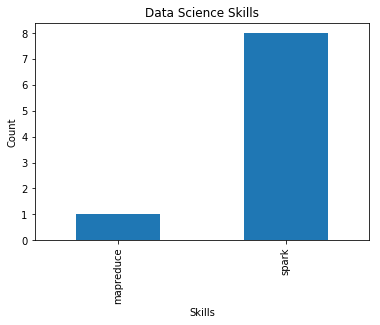

In [145]:
pseries = pd.Series(skill_set)
pseries.sort_index(ascending=False)

pseries.plot(kind= 'bar')
plt.title('Data Science Skills')
plt.xlabel('Skills')
plt.ylabel('Count')
plt.show()